# Comparisson between different methods for detecting outflows and studying their energetic properties

In [1]:
import numpy as np
from astropy.io import ascii
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
# Import the data from the parametric and the non-parametric analysis
giovanna = ascii.read('../kinematic_analysis/Tables/outflow_energy_giovanna.txt').to_pandas()
nonpar = ascii.read('../kinematic_analysis/Tables/outflow_energy_nonpar.txt').to_pandas()
par = ascii.read('../kinematic_analysis/Tables/outflow_energy_par.txt').to_pandas()

In [3]:
giovanna

,Name,LogMof,eLogMof,LogEkin,eLogEkin,Rout,eRout,LogE.kin,eLogE.kin,M.of,eM.of
0,J0025-10,5.17,0.01350,53.7,0.01690,1.0,0.0,35.5,0.02000,0.2680,0.00897
1,J0114+00,5.25,0.25300,54.5,0.30600,1.0,0.0,36.6,0.35300,0.7340,0.45200
2,J0123+00,5.39,0.01900,54.0,0.02260,1.0,0.0,35.7,0.02690,0.4680,0.02140
3,J0142+14,5.92,0.08610,54.8,0.09030,1.0,0.0,36.8,0.09460,2.3500,0.46400
4,J0217-00,5.29,0.05770,54.4,0.06130,1.0,0.0,36.4,0.06600,0.6660,0.08600
5,J0217-01,4.53,0.24100,53.1,0.95100,1.0,0.0,34.8,1.40000,0.0628,0.06470
6,J0218-00,5.22,0.02240,53.7,0.05050,1.0,0.0,35.4,0.07260,0.2700,0.01910
7,J0227+01,5.00,0.03850,53.6,0.04910,1.0,0.0,35.5,0.05880,0.2060,0.01950
8,J0234-07,5.62,0.00536,54.3,0.00771,1.0,0.0,36.2,0.00983,0.9040,0.01260
9,J0249+00,5.62,0.02290,54.6,0.03890,1.0,0.0,36.5,0.05260,1.2100,0.07750


In [4]:
nonpar

,Name,LogMof,eLogMof,LogEkin,eLogEkin,Rout,eRout,LogE.kin,eLogE.kin,M.of,eM.of
0,J0025-10,5.51,0.004250,54.2,0.01160,1.0,0.0,36.0,0.01770,0.656,0.00996
1,J0114+00,5.81,0.007130,54.7,0.13800,1.0,0.0,36.8,0.22900,1.740,0.23300
2,J0123+00,5.61,0.005540,54.3,0.01830,1.0,0.0,36.1,0.02980,0.809,0.01730
3,J0142+14,6.27,0.004280,55.4,0.02010,1.0,0.0,37.5,0.03000,6.580,0.16200
4,J0217-00,5.49,0.004440,54.6,0.01960,1.0,0.0,36.6,0.03030,1.040,0.02500
5,J0217-01,5.26,0.004460,54.2,0.12300,1.0,0.0,36.2,0.18700,0.551,0.07670
6,J0218-00,5.59,0.000771,54.0,0.04920,1.0,0.0,35.7,0.07820,0.576,0.03090
7,J0227+01,5.41,0.005010,54.1,0.01500,1.0,0.0,35.9,0.02270,0.529,0.01020
8,J0234-07,5.52,0.002680,54.5,0.00516,1.0,0.0,36.5,0.00774,0.942,0.00719
9,J0249+00,5.84,0.002620,55.0,0.05310,1.0,0.0,37.1,0.08830,2.350,0.12100


In [5]:
par

,Name,LogMof,eLogMof,LogEkin,eLogEkin,Rout,eRout,LogE.kin,eLogE.kin,M.of,eM.of
0,J0025-10,5.56,0.1040,52.2,0.3790,1.0,0.0,33.1,0.5600,0.0740,0.0324
1,J0114+00,6.09,0.1540,54.4,0.4450,1.0,0.0,36.1,0.6420,1.7100,0.9020
2,J0123+00,5.82,0.1450,53.1,0.2420,1.0,0.0,34.2,0.3230,0.2800,0.1010
3,J0142+14,7.05,0.0291,53.9,0.1550,1.0,0.0,34.8,0.2270,2.8500,0.5410
4,J0217-00,6.25,0.0445,54.2,0.1070,1.0,0.0,35.7,0.1500,1.6100,0.2430
5,J0217-01,5.88,0.3240,53.2,1.0400,1.0,0.0,34.4,1.5200,0.2720,0.5600
6,J0227+01,5.79,0.0836,53.0,0.1840,1.0,0.0,34.0,0.2620,0.2270,0.0624
7,J0234-07,6.08,0.0143,53.6,0.0216,1.0,0.0,34.9,0.0279,0.6920,0.0266
8,J0249+00,6.48,0.0251,54.7,0.2000,1.0,0.0,36.6,0.2820,1.9800,0.4690
9,J0320+00,5.81,0.3390,52.5,1.0900,1.0,0.0,33.4,1.5900,0.0859,0.2020


In [6]:
aux_nonpar_0 = nonpar.drop(nonpar[(nonpar['Name']=='J0218-00')].index)
aux_nonpar = aux_nonpar_0.drop(aux_nonpar_0[(aux_nonpar_0['Name']=='J0334+00')].index)
aux_gio_0 = giovanna.drop(giovanna[(nonpar['Name']=='J0218-00')].index)
aux_gio = aux_gio_0.drop(aux_gio_0[(aux_nonpar_0['Name']=='J0334+00')].index)

### Comparisson of the outflow mass rate and kinetic energy from each method

#### Histograms

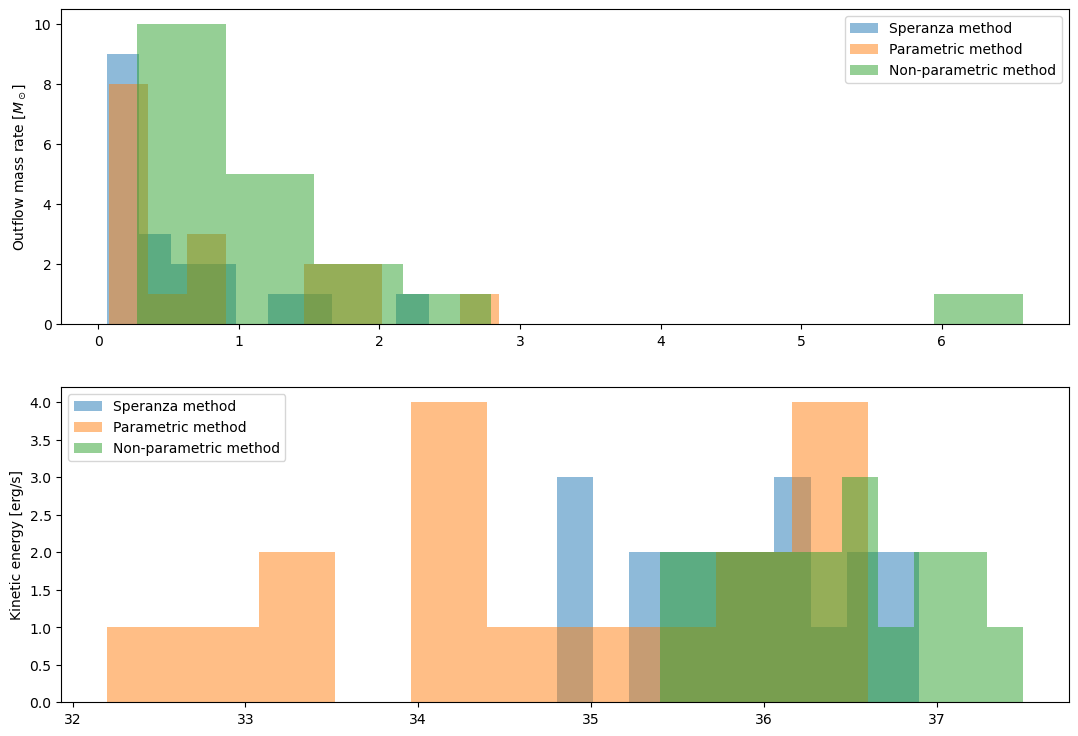

In [7]:
f,(ax1,ax2) = plt.subplots(2,1,figsize=(13,9))
ax1.hist(giovanna['M.of'],alpha=0.5,label ='Speranza method')
ax1.hist(par['M.of'],alpha=0.5,label ='Parametric method')
ax1.hist(nonpar['M.of'],alpha=0.5,label ='Non-parametric method')
ax1.set_ylabel(r'Outflow mass rate [$M_\odot$]')
ax1.legend()

ax2.hist(giovanna['LogE.kin'],alpha=0.5,label ='Speranza method')
ax2.hist(par['LogE.kin'],alpha=0.5,label ='Parametric method')
ax2.hist(nonpar['LogE.kin'],alpha=0.5,label ='Non-parametric method')
ax2.set_ylabel(r'Kinetic energy [erg/s]')
ax2.legend()

In [8]:
mean_values = pd.DataFrame(data={'Method':['Giovanna','NonParametric','Parametric'],\
                                 'OutflowMassRate (M.of)':[giovanna['M.of'].mean(),nonpar['M.of'].mean(),par['M.of'].mean()],\
                                 'KineticEnergy (LogE.kin)':[giovanna['LogE.kin'].mean(),nonpar['LogE.kin'].mean(),par['LogE.kin'].mean()]})

In [9]:
mean_values

,Method,OutflowMassRate (M.of),KineticEnergy (LogE.kin)
0,Giovanna,0.593768,35.857895
1,NonParametric,1.230789,36.384211
2,Parametric,0.832376,34.788235


#### Graphs

Text(0, 0.5, 'Speranza method: outflow mass rate [$M_\\odot$]')

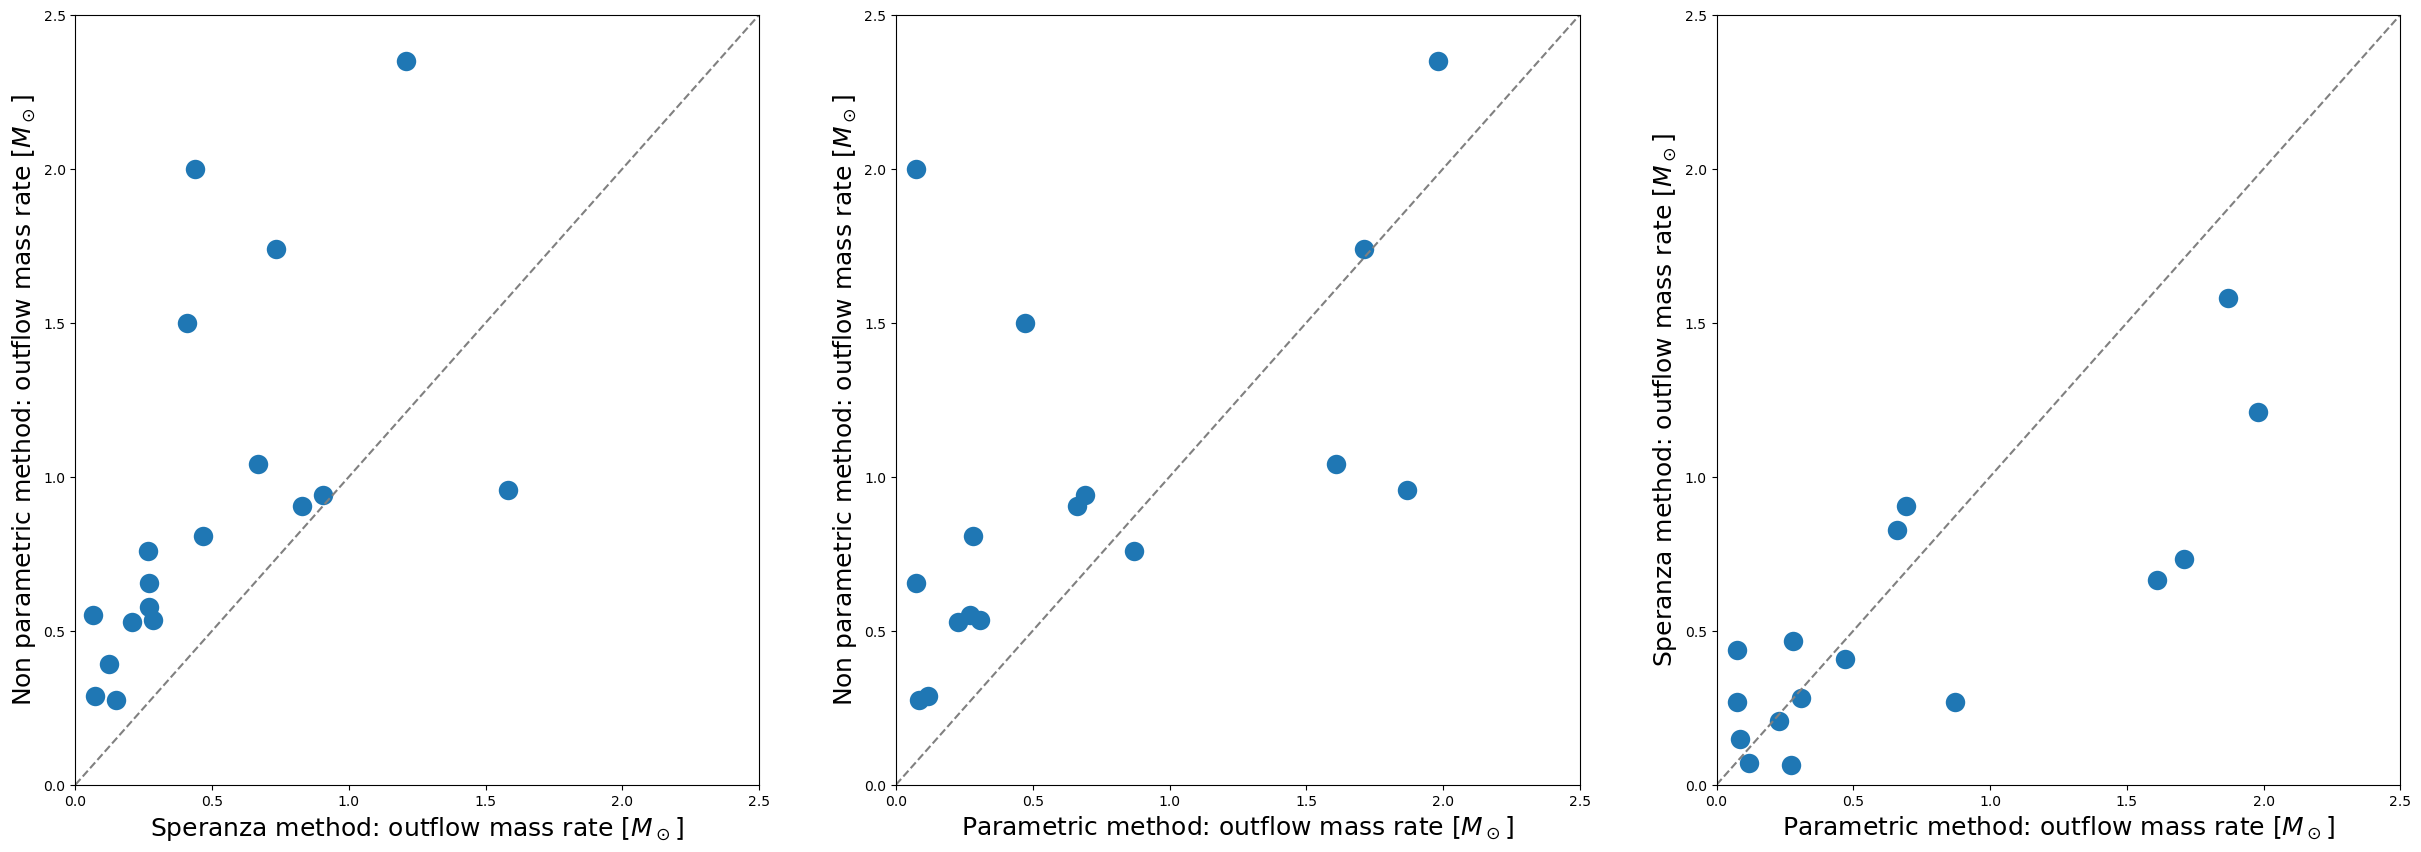

In [10]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))
ax1.scatter(giovanna['M.of'],nonpar['M.of'],linewidths=8)
ax1.plot([0,3],[0,3],linestyle='--',color='gray')
ax1.set_xlim(0,2.5)
ax1.set_ylim(0,2.5)
ax1.set_xlabel(r'Speranza method: outflow mass rate [$M_\odot$]',fontsize=18)
ax1.set_ylabel(r'Non parametric method: outflow mass rate [$M_\odot$]',fontsize=18)

ax2.scatter(par['M.of'],aux_nonpar['M.of'],linewidths=8)
ax2.plot([0,3],[0,3],linestyle='--',color='gray')
ax2.set_xlim(0,2.5)
ax2.set_ylim(0,2.5)
ax2.set_xlabel(r'Parametric method: outflow mass rate [$M_\odot$]',fontsize=18)
ax2.set_ylabel(r'Non parametric method: outflow mass rate [$M_\odot$]',fontsize=18)

ax3.scatter(par['M.of'],aux_gio['M.of'],linewidths=8)
ax3.plot([0,3],[0,3],linestyle='--',color='gray')
ax3.set_xlim(0,2.5)
ax3.set_ylim(0,2.5)
ax3.set_xlabel(r'Parametric method: outflow mass rate [$M_\odot$]',fontsize=18)
ax3.set_ylabel(r'Speranza method: outflow mass rate [$M_\odot$]',fontsize=18)

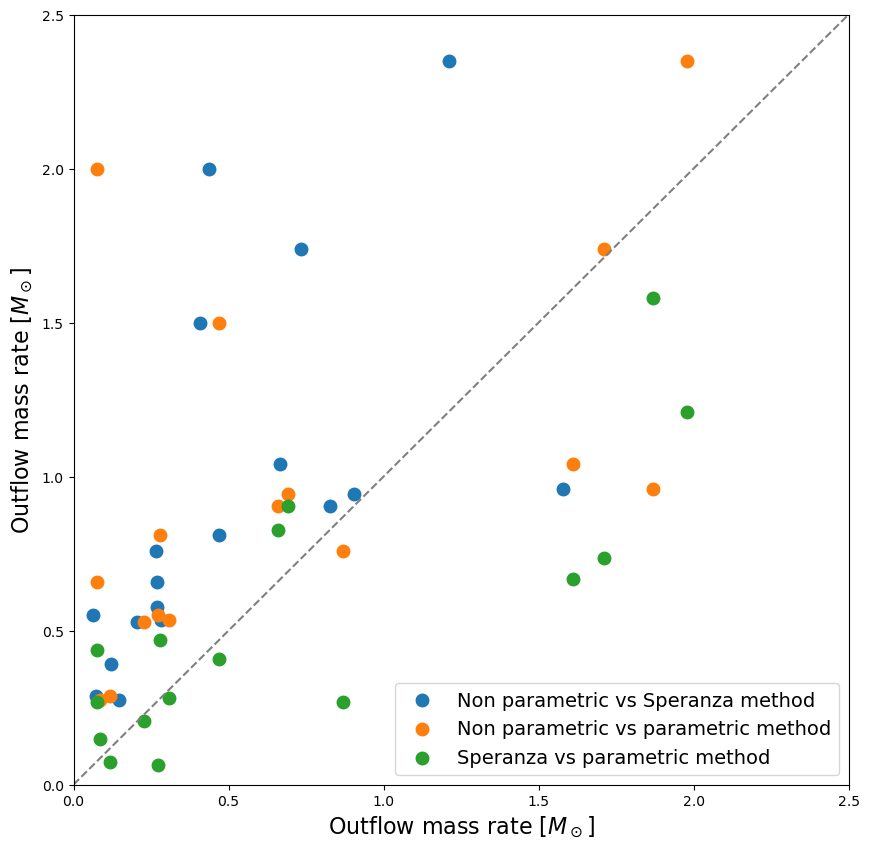

In [11]:
f,ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.scatter(giovanna['M.of'],nonpar['M.of'],linewidths=4,label='Non parametric vs Speranza method')
ax1.scatter(par['M.of'],aux_nonpar['M.of'],linewidths=4,label='Non parametric vs parametric method')
ax1.scatter(par['M.of'],aux_gio['M.of'],linewidths=4,label='Speranza vs parametric method')
ax1.plot([0,3],[0,3],linestyle='--',color='gray')
ax1.set_xlim(0,2.5)
ax1.set_ylim(0,2.5)
ax1.set_xlabel(r'Outflow mass rate [$M_\odot$]',fontsize=16)
ax1.set_ylabel(r'Outflow mass rate [$M_\odot$]',fontsize=16)
ax1.legend(fontsize=14)